# Sampling: Scatter Matrix

Loading the appropirate Python and COBRApy packages

In [1]:
import cobra.test
from cobra.test import create_test_model
import numpy as np
import pandas as pd
from cobra.sampling import sample
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

Set model environmental conditions

In [2]:
model = create_test_model("textbook")
model.reactions.EX_o2_e.lower_bound = -20
model.reactions.EX_glc__D_e.lower_bound = -10

Academic license - for non-commercial use only - expires 2022-12-07
Using license file C:\Users\scott\gurobi.lic


Sample aerobic model

In [3]:
aerobic = sample(model, 10000, processes=8) #Set this to 1000 for faster, less accurate performance
aerobic

Read LP format model from file C:\Users\scott\AppData\Local\Temp\tmp88jrn0d9.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros


,ACALD,ACALDt,ACKr,ACONTa,ACONTb,ACt2r,ADK1,AKGDH,AKGt2r,ALCD2x,...,RPI,SUCCt2_2,SUCCt3,SUCDi,SUCOAS,TALA,THD2,TKT1,TKT2,TPI
0,-1.777846,-0.153658,-2.346530,5.005621,5.005621,-2.346530,0.642813,3.944383,-0.003943,-1.624188,...,-1.065222,1.749108,2.715671,91.009248,-3.944383,0.544769,3.521359,0.544769,0.335475,8.500255
1,-1.305108,-0.194850,-4.460319,6.128774,6.128774,-4.460319,2.469807,0.283393,-1.838164,-1.110259,...,-1.330770,15.762567,17.564390,235.841643,-0.283393,1.299493,4.194614,1.299493,1.286915,8.316636
2,-1.938884,-0.138588,-8.734872,2.906389,2.906389,-8.734872,15.746899,0.818898,-0.599599,-1.800296,...,-0.041968,7.911208,8.190484,185.820655,-0.818898,0.023273,8.145928,0.023273,0.015756,9.703231
3,-0.802549,-0.412259,-10.702693,1.490912,1.490912,-10.702693,21.511584,0.439973,-0.401246,-0.390290,...,-0.781920,1.308504,2.326787,178.871715,-0.439973,0.762385,21.686529,0.762385,0.754530,9.171012
4,-1.691449,-1.153807,-6.607351,4.706237,4.706237,-6.607351,13.239725,0.683371,-0.218209,-0.537643,...,-0.096225,3.217482,4.012667,59.839924,-0.683371,0.031395,5.853625,0.031395,0.005325,9.703301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-6.920215,-5.871294,-3.039584,4.441869,4.441869,-3.039584,2.603245,1.204832,-0.292446,-1.048920,...,-0.991145,0.547786,0.678043,424.019425,-1.204832,0.989804,5.383459,0.989804,0.989264,8.016471
9996,-6.582203,-4.721533,-4.012859,3.546827,3.546827,-4.012859,8.533847,1.333358,-0.289749,-1.860671,...,-0.222984,8.405945,8.507788,439.462254,-1.333358,0.206684,7.367723,0.206684,0.200129,7.956074
9997,-1.719753,-1.619387,-2.956487,4.994072,4.994072,-2.956487,2.387664,2.213886,-0.633714,-0.100365,...,-0.182051,10.863574,11.509416,532.238927,-2.213886,0.114478,0.445101,0.114478,0.087304,6.728407
9998,-0.670793,-0.023512,-2.927129,7.293951,7.293951,-2.927129,2.787071,2.808552,-0.859890,-0.647281,...,-0.268096,1.497608,4.875467,397.434688,-2.808552,0.258196,1.280498,0.258196,0.254215,8.762867


Let's plot the histograms of some of the glycolysis reactions in a list. In this case, the "figsize" argument makes the subplots large enough to read.

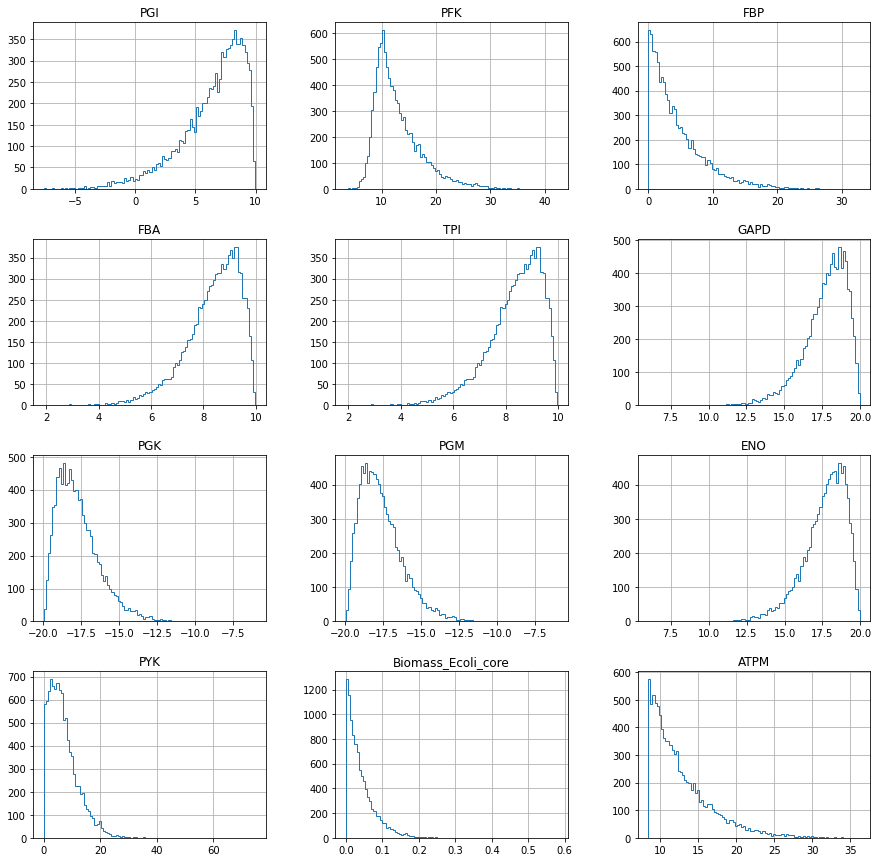

In [4]:
aerobic.hist(column = ['PGI','PFK','FBP','FBA','TPI','GAPD','PGK','PGM','ENO','PYK','Biomass_Ecoli_core','ATPM'], 
       bins=100,figsize=(15,15),histtype = 'step');

Create a scatter matrix

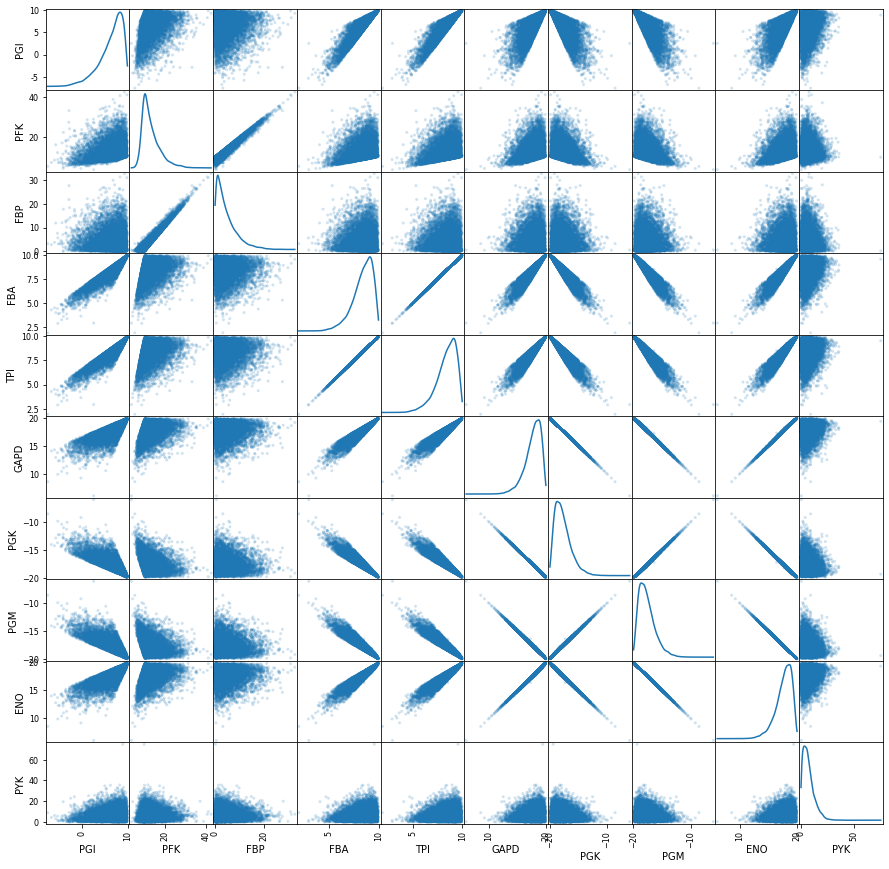

In [5]:
reactions2 = ['PGI','PFK','FBP','FBA','TPI','GAPD','PGK','PGM','ENO','PYK']
pd.plotting.scatter_matrix(aerobic[reactions2], alpha=0.2,figsize=(15,15),diagonal='kde');

Find the correlation coefficients for the scatter matrix elements [1]. 

In [6]:
corrrelation = aerobic[reactions2].corr(method="pearson")
corrrelation

,PGI,PFK,FBP,FBA,TPI,GAPD,PGK,PGM,ENO,PYK
PGI,1.000000,0.235079,0.017561,0.934882,0.934882,0.766065,-0.766065,-0.764118,0.764118,0.127521
PFK,0.235079,1.000000,0.972422,0.251774,0.251774,0.238528,-0.238528,-0.240821,0.240821,0.013912
FBP,0.017561,0.972422,1.000000,0.019116,0.019116,0.018851,-0.018851,-0.021608,0.021608,-0.015734
FBA,0.934882,0.251774,0.019116,1.000000,1.000000,0.944319,-0.944319,-0.942707,0.942707,0.124925
TPI,0.934882,0.251774,0.019116,1.000000,1.000000,0.944319,-0.944319,-0.942707,0.942707,0.124925
GAPD,0.766065,0.238528,0.018851,0.944319,0.944319,1.000000,-1.000000,-0.999184,0.999184,0.108429
PGK,-0.766065,-0.238528,-0.018851,-0.944319,-0.944319,-1.000000,1.000000,0.999184,-0.999184,-0.108429
PGM,-0.764118,-0.240821,-0.021608,-0.942707,-0.942707,-0.999184,0.999184,1.000000,-1.000000,-0.110395
ENO,0.764118,0.240821,0.021608,0.942707,0.942707,0.999184,-0.999184,-1.000000,1.000000,0.110395
PYK,0.127521,0.013912,-0.015734,0.124925,0.124925,0.108429,-0.108429,-0.110395,0.110395,1.000000


## References

1. Correlation coeficients - https://pythontic.com/pandas/dataframe-computations/correlation#:~:text=pandas%E2%80%99%20DataFrame%20class%20has%20the%20method%20corr%20%28%29,using%20these%20methods%20vary%20from%20%2B1%20to%20-1.